Ahoj Honzo, nejsem si jistá, jestli to včera zaznělo úplně jasně, tak se chci jen ujistit, jestli prosím počítáš s těmi vizualizacemi v tomhle duchu (viz obrázek) pro všechny ty seznamy termínů 

(1000 most common pagan early,
1000 most common pagan late,
1000 most common christian early,
1000 most common christian late,
500 with ekhthros christian early,
500 with ekhthros christian late,
500 with ekhthros pagan all)

Tak aby tam bylo barevně rozlišené zastoupení těch termínů v našich definovaných sedmi kategorií.

In [49]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D

In [50]:
# load the corpus
with open ("/srv/data/enemy-christ/large-data/grouped_df.pkl", "rb") as f:
    grouped = pickle.load(f)

# raw frequencies

In [ ]:
# make your subcorpora dataframes from "enemy_subcorpus" column
christian_0_300 = grouped[grouped["enemy_subcorpus"]=="christian_0_300"]
christian_300_600 = grouped[grouped["enemy_subcorpus"]=="christian_300_600"]
pagan_0_300 = grouped[grouped["enemy_subcorpus"]=="pagan_0_300"]
pagan_300_600 = grouped[grouped["enemy_subcorpus"]=="pagan_300_600"]

N = 1000

# frequencies with ekthros

In [ ]:
from nltk.probability import FreqDist

stop_words = {'μή', 'ἑαυτοῦ', 'ἄν', "ἀλλ'", 'ἀλλά', 'ἄλλος', 'ἀπό', 'ἄρα', 'αὐτός', "δ'", 'δέ', 'δή', 'διά', 'δαί', 'δαίς', 'ἔτι', 'ἐγώ', 'ἐκ', 'ἐμός', 'ἐν', 'ἐπί', 'εἰ', 'εἰμί', 'εἴμι', 'εἰς', 'γάρ', 'γε', 'γα', 'ἡ', 'ἤ', 'καί', 'κατά', 'μέν', 'μετά', 'μή', 'ὁ', 'ὅδε', 'ὅς', 'ὅστις', 'ὅτι', 'οὕτως', 'οὗτος', 'οὔτε', 'οὖν', 'οὐδείς', 'οἱ', 'οὐ', 'οὐδέ', 'οὐκ', 'περί', 'πρός', 'σύ', 'σύν', 'τά', 'τε', 'τήν', 'τῆς', 'τῇ', 'τι', 'τί', 'τις', 'τίς', 'τό', 'τοί', 'τοιοῦτος', 'τόν', 'τούς', 'τοῦ', 'τῶν', 'τῷ', 'ὑμός', 'ὑπέρ', 'ὑπό', 'ὡς', 'ὦ', 'ὥστε', 'ἐάν', 'παρά', 'σός'}

fdist1 = FreqDist(word for sent in christian_0_300['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)
fdist2 = FreqDist(word for sent in christian_300_600['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)
fdist3 = FreqDist(word for sent in pagan_0_300['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)
fdist4 = FreqDist(word for sent in pagan_300_600['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)

In [51]:
pagan_early_cat = {
    "Idolatry_heresy_magic": ["φάρμακον"],
    "Hypocrisy_falseness": ["κενός", "ψεῦδος", "ψευδής", "διπλόος", "σοφιστής", "διφθόγγος", "δισσός", "πρόφασις", "δίφθογγος", "ψυχρός"],
    "Inflated_self_esteem": ["ὑπερβολή", "πικρός"],
    "Moral_depravity": ["ἡδονή", "γαστήρ", "νόσημα", "φλεγμονή", "μαλακός", "θερμότης", "ἀσθενής", "αἰσχρός", "ἐπιθυμία", "ἐπιθυμέω", "φθείρω", "φθορά", "ἁμαρτάνω"],
    "Trouble_making": ["διαφορά", "αἴτιος", "πόλεμος", "μάχη", "ἀπόλλυμι", "κατηγορέω", "ὅπλον", "πειράω", "χαλεπός", "βαρύνω", "μάχομαι", "βλάπτω", "σφοδρός", "κίνδυνος", "ἀποκτείνω", "ὁρμάω", "ἁλίσκομαι", "ἀναγκάζω", "χολή", "ὀργή", "θηρίον", "διώκω", "πολεμέω", "πληγή", "διαίρεσις", "στάσις", "βιάζω", "βία", "κτείνω", "ἀντίκειμαι", "ἐλαύνω", "ἀντιλέγω", "φόνος", "παροξύνω", "ἀναιρέω", "δεινός", "θυμός", "ἐλέγχω", "δείδω"],
    "Evil_characters": ["βάρβαρος"],
    "Other": ["κακός", "κακία", "ἐναντίος", "ἀδύνατος", "ξένος", "ἀλλότριος", "πονηρός", "ἰδιώτης", "ἡσσάομαι", "κατηγορία", "δυσκρασία", "ἐναντίον", "ἐχθρός"]
  }

pagan_late_cat = {
  "Idolatry_heresy_magic": [],
  "Hypocrisy_falseness": ["κενός", "ψεῦδος", "ψευδής", "διπλόος", "σοφιστής", "ψυχρός", "ψεύδω", "πλανάω"],
  "Inflated_self_esteem": ["ὑπερβολή", "ὑπεροχή", "ὕβρις", "πικρός"],
  "Moral_depravity": ["ἡδονή", "θερμότης", "αἰσχρός", "ἐπιθυμία", "ἐπιθυμέω", "φθείρω", "φθορά", "φθείρομαι", "ἄδικος"],
  "Trouble_making": ["διαφορά", "αἴτιος", "πόλεμος", "μάχη", "ἀπόλλυμι", "κατηγορέω", "ὅπλον", "πειράω", "χαλεπός", "μάχομαι", "κίνδυνος", "ἀναγκάζω", "ὀργή", "διώκω", "πληγή", "διαίρεσις", "στάσις", "κτείνω", "ἀντίκειμαι", "ἐλαύνω", "ἀντιλέγω", "φόνος", "αἰτιάομαι", "πολέμιος", "μέμφομαι", "βέλος", "κτείνω", "ἐλέγχω", "θυμός", "κατηγορία"],
  "Evil_characters": ["βάρβαρος"],
  "Other": ["κακός", "κακία", "ἐναντίος", "ἐναντιόομαι", "ἐναντίωσις", "ἀδύνατος", "δείδω", "ξένος", "ἀλλότριος", "πονηρός", "ἄπειρος", "ἐχθρός", "ἀντικείμενος", "ἁμαρτάνω"]
}

christ_early_cat = {
  "Idolatry_heresy_magic": ["εἴδωλον", "μάγος", "φάρμακον", "βλασφημέω", "ἀσεβής", "ἀσεβέω", "δαίμων", "διάβολος", "δαιμόνιον", "Σατανᾶς", "δράκων", "ὄφις", "λατρεύω", "θηρίον", "σκότος"],
  "Hypocrisy_falseness": ["ψευδής", "ἀπιστέω", "ἄπιστος", "ἀπάτη", "ψεύδω", "ἀπιστία", "ἐπιβουλεύω", "κρυπτός", "ἀφορμή"],
  "Inflated_self_esteem": ["μισέω"],
  "Moral_depravity": ["ἀδικέω", "ἄδικος", "ἀνομία", "ἀδικία", "ἀκάθαρτος", "πορνεία", "ἀσθένεια", "αἰσχρός", "γαστήρ", "κοιλία", "μάταιος", "πειρασμός", "ἄφρων", "φθορά"],
  "Trouble_making": ["πόλεμος", "πολέμιος", "δέω", "ἀποθνῄσκω", "ἀπόλλυμι", "κρίσις", "ὀργή", "ἀποκτείνω", "διώκω", "θυμός", "διαφορά", "ἅπτω", "φυλακή", "θλῖψις", "κρίμα", "ἔλεγχος", "κατέχω", "ἀγωνίζομαι", "ταράσσω", "ἀναγκάζω", "διαφθείρω", "θνῄσκω", "κριτής", "τιμωρία", "πληγή", "ὑπηρέτης", "ἐγκαλέω", "αἴτιος", "πάσχω", "πάθος", "μαρτυρέω", "νόσος", "μάρτυς", "λύπη", "λυπέω", "χαλεπός", "μαρτυρία", "μαρτύριον", "μάχαιρα", "ὅπλον", "αἷμα", "λῃστής", "θάνατος", "νεκρός", "δεινός", "κίνδυνος", "μοχθηρός"],
  "Evil_characters": ["Κέλσος", "Σίμων", "Αἰγύπτιος", "ἄρχων", "ἀρχιερεύς", "Φαρισαῖος", "δεσπότης", "ἱερεύς", "βάρβαρος", "γραμματεύς", "Ἅιδης", "Καῖσαρ", "Ῥωμαῖος", "Φαραώ", "ἡγεμονικός", "Βαβυλών", "ἔθνος", "Ἰουδαῖος"],
  "Other": ["ἁμαρτία", "ἁμαρτάνω", "ἁμαρτωλός", "ἁμάρτημα", "κακός", "κακία", "ἥσσων", "πονηρία", "πονηρός", "ἄγνοια", "ἐχθρός", "ἐναντίος"]
}

christ_late_cat = {
  "Idolatry_heresy_magic": ["αἵρεσις", "εἴδωλον", "αἱρετικός", "βλασφημία", "ἀσεβής", "ἀσέβεια", "δαίμων", "διάβολος", "ὄφις", "θηρίον", "κρίνω", "σκότος", "σκῐᾱ́"],
  "Hypocrisy_falseness": ["ψευδής", "ψεῦδος", "ἀπάτη", "ψεύδω", "κρύπτω", "φαῦλος", "ἐπιβουλή"],
  "Inflated_self_esteem": [],
  "Moral_depravity": ["ἀδικία", "ἀδικέω", "ἄδικος", "αἰσχρός", "γαστήρ", "ἀσθένεια", "χρῆμα", "ἡδονή", "μίξις", "φθορά", "φθείρω"],
  "Trouble_making": ["πολέμιος", "πόλεμος", "δέω", "διαφορά", "κατηγορέω", "κατηγορία", "ὀργή", "κρίσις", "ἀπόλλυμι", "ἀπόφασις", "ἐλέγχω", "ἔλεγχος", "θυμός", "ἀντίκειμαι", "δεσμός", "στρατιώτης", "διαφθείρω", "τιμωρία", "μάχη", "πληγή", "διώκω", "καθαιρέω", "αἰχμαλωσία", "ὁρμή", "ἔγκλημα", "ἀποκτείνω", "φυγή", "φόνος", "διωγμός", "μάχομαι", "κίνδυνος", "βία", "λυπέω", "αἴτιος", "πάσχω", "κρατέω", "τᾰ́ξῐς", "αἷμα", "μάρτυς", "ἀποθνῄσκω", "βαρύς", "μαρτυρέω", "μαρτυρία", "χαλεπός", "ᾰ̓νᾰγκᾰ́ζω", "πάθη", "μένος", "νοσέω", "λύπη", "μαρτύριον", "στρατηγός", "ἀνάγκη", "πάθος", "θάνατος", "νεκρός", "δεινός", "δείδω", "διαιρέω", "ὁρίζω", "διαίρεσις", "χωρίζω", "διακρίνω", "χωριστός", "διάκρισις"],
  "Evil_characters": ["Ῥωμαῖος", "Ἰούδας", "Αἴγυπτος", "βάρβαρος", "Αἰγύπτιος", "ἄρχων", "δεσπότης", "Ῥώμη", "τύραννος", "ἀρχιερεύς", "Δεσπότης", "Ἀσσύριος", "Σαμαρεία", "ἡγεμών", "ξένος", "ἔθνος", "Ἰουδαῖος"],
  "Other": ["ἁμαρτία", "ἁμαρτάνω", "κενός", "κακός", "ἀποφατικός", "ἥσσων", "μέλας", "νόσος", "κακία", "πρόβλημα", "ἐναντίον", "πονηρός", "ἐχθρός", "ἐναντίος"]
}

In [52]:
def cooc_fig(target_sentences, most_occur, categories, title):
    most_occur = [word for word, count in most_occur]

    vectorizer = CountVectorizer(vocabulary=most_occur, lowercase=True) # , token_pattern=r"(?u)\b\w+\b")
    X = vectorizer.fit_transform([" ".join(sent) for sent in target_sentences])
    X_dense = X.toarray()

    # Create the co-occurrence matrix
    co_occurrence_matrix = (X.T @ X).toarray()

    # Replace diagonal with zeros (optional, if you don't want to count the word itself as its neighbor)
    np.fill_diagonal(co_occurrence_matrix, 0)

    co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=most_occur, columns=most_occur)

    # create a networkx network object straight from our co-occurrance network
    G = nx.from_pandas_adjacency(co_occurrence_df)
    for i, row in co_occurrence_df.iterrows():
        for j, weight in row.items():
            if weight > 0:
                G[i][j]['weight'] = weight

    #G.remove_edges_from(nx.selfloop_edges(G))

    # Calculate positions using the spring layout
    pos = nx.spring_layout(G, k=0.15, iterations=20, scale=2, seed=42)

    # Define color mapping

    color_map = []
    omitted_nodes = []
    for node in G:
        if node in categories['Idolatry_heresy_magic']:
            color_map.append('yellow')
        elif node in categories['Hypocrisy_falseness']:
            color_map.append('red')
        elif node in categories['Inflated_self_esteem']:
            color_map.append('blue')
        elif node in categories['Moral_depravity']:
            color_map.append('magenta')
        elif node in categories['Trouble_making']:
            color_map.append('green')
        elif node in categories['Evil_characters']:
            color_map.append('purple')
        elif node in categories['Other']:
            color_map.append('grey')
        else:
            color_map.append('white')
            omitted_nodes.append(node)

    # Get x and y positions separately
    x_vals, y_vals = zip(*pos.values())

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

    # Draw filtered weighted edges
    filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if u not in omitted_nodes and v not in omitted_nodes]
    weights = [d['weight'] for _, _, d in filtered_edges]

    # Draw nodes and edges
    nx.draw_networkx_edges(G, pos, edgelist=filtered_edges, width=weights, alpha=0.1, ax=ax)
    #nx.draw_networkx_nodes(G, pos, node_size=50, node_color=color_map, ax=ax)

    # Draw each label with its corresponding color
    for node, (x, y) in pos.items():
        if node not in omitted_nodes:
            nx.draw_networkx_labels(G, {node: (x, y)}, labels={node: node},
                                    font_size=10,
                                    #font_size=np.log2(wordcounts[node])*5,
                                    font_family="sans-serif", verticalalignment='bottom',
                                    font_color=color_map[list(G.nodes()).index(node)], ax=ax)
            


    # Define legend elements
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Idolatry_heresy_magic', markerfacecolor='yellow', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Hypocrisy_falseness', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Inflated_self_esteem', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Moral_depravity', markerfacecolor='magenta', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Trouble_making', markerfacecolor='green', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Evil_characters', markerfacecolor='purple', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='grey', markersize=10),
    ]

    # Customize legend
    ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1),
               numpoints=1)

    # Set the x and y limits to fit all values
    ax.set_xlim(min(x_vals) - 0.1, max(x_vals) + 0.1)
    ax.set_ylim(min(y_vals) - 0.1, max(y_vals) + 0.1)
    ax.set_title(title, fontsize=16)


    # Hide axes
    ax.axis("off")

    # Show the plot
    plt.show()

/home/tvrzj/Documents/Projects/approaching_rel/.env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


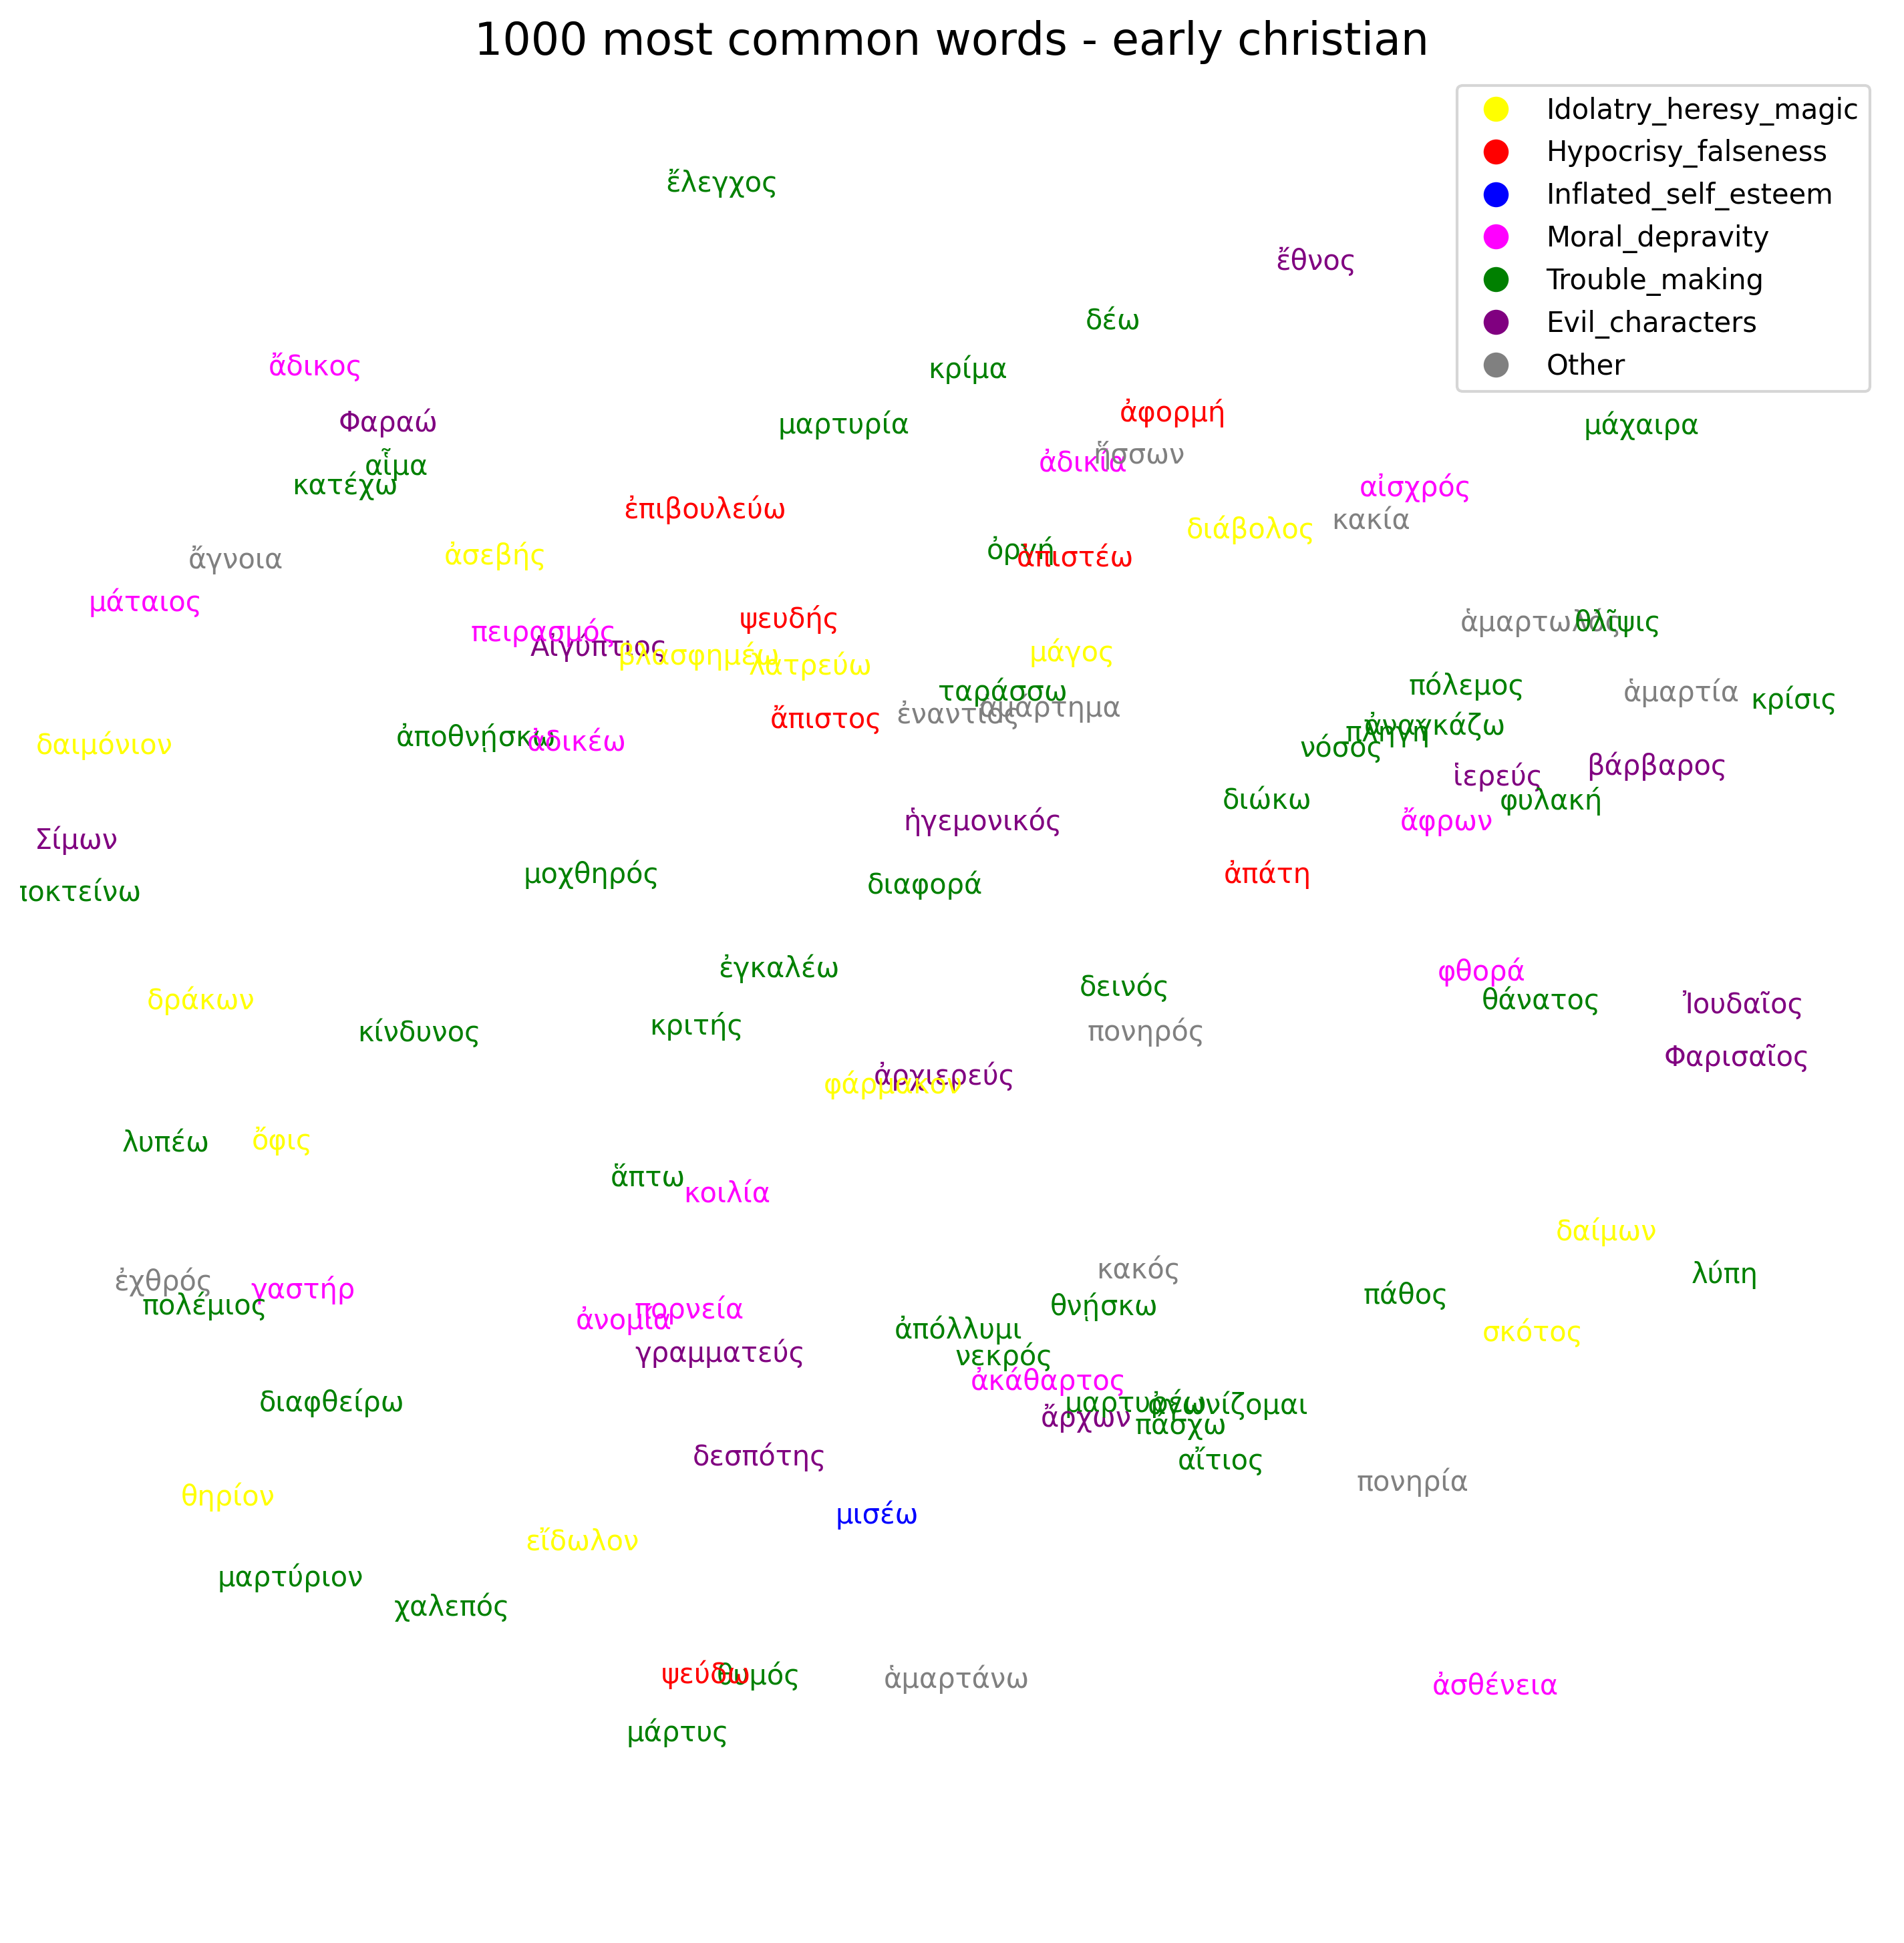

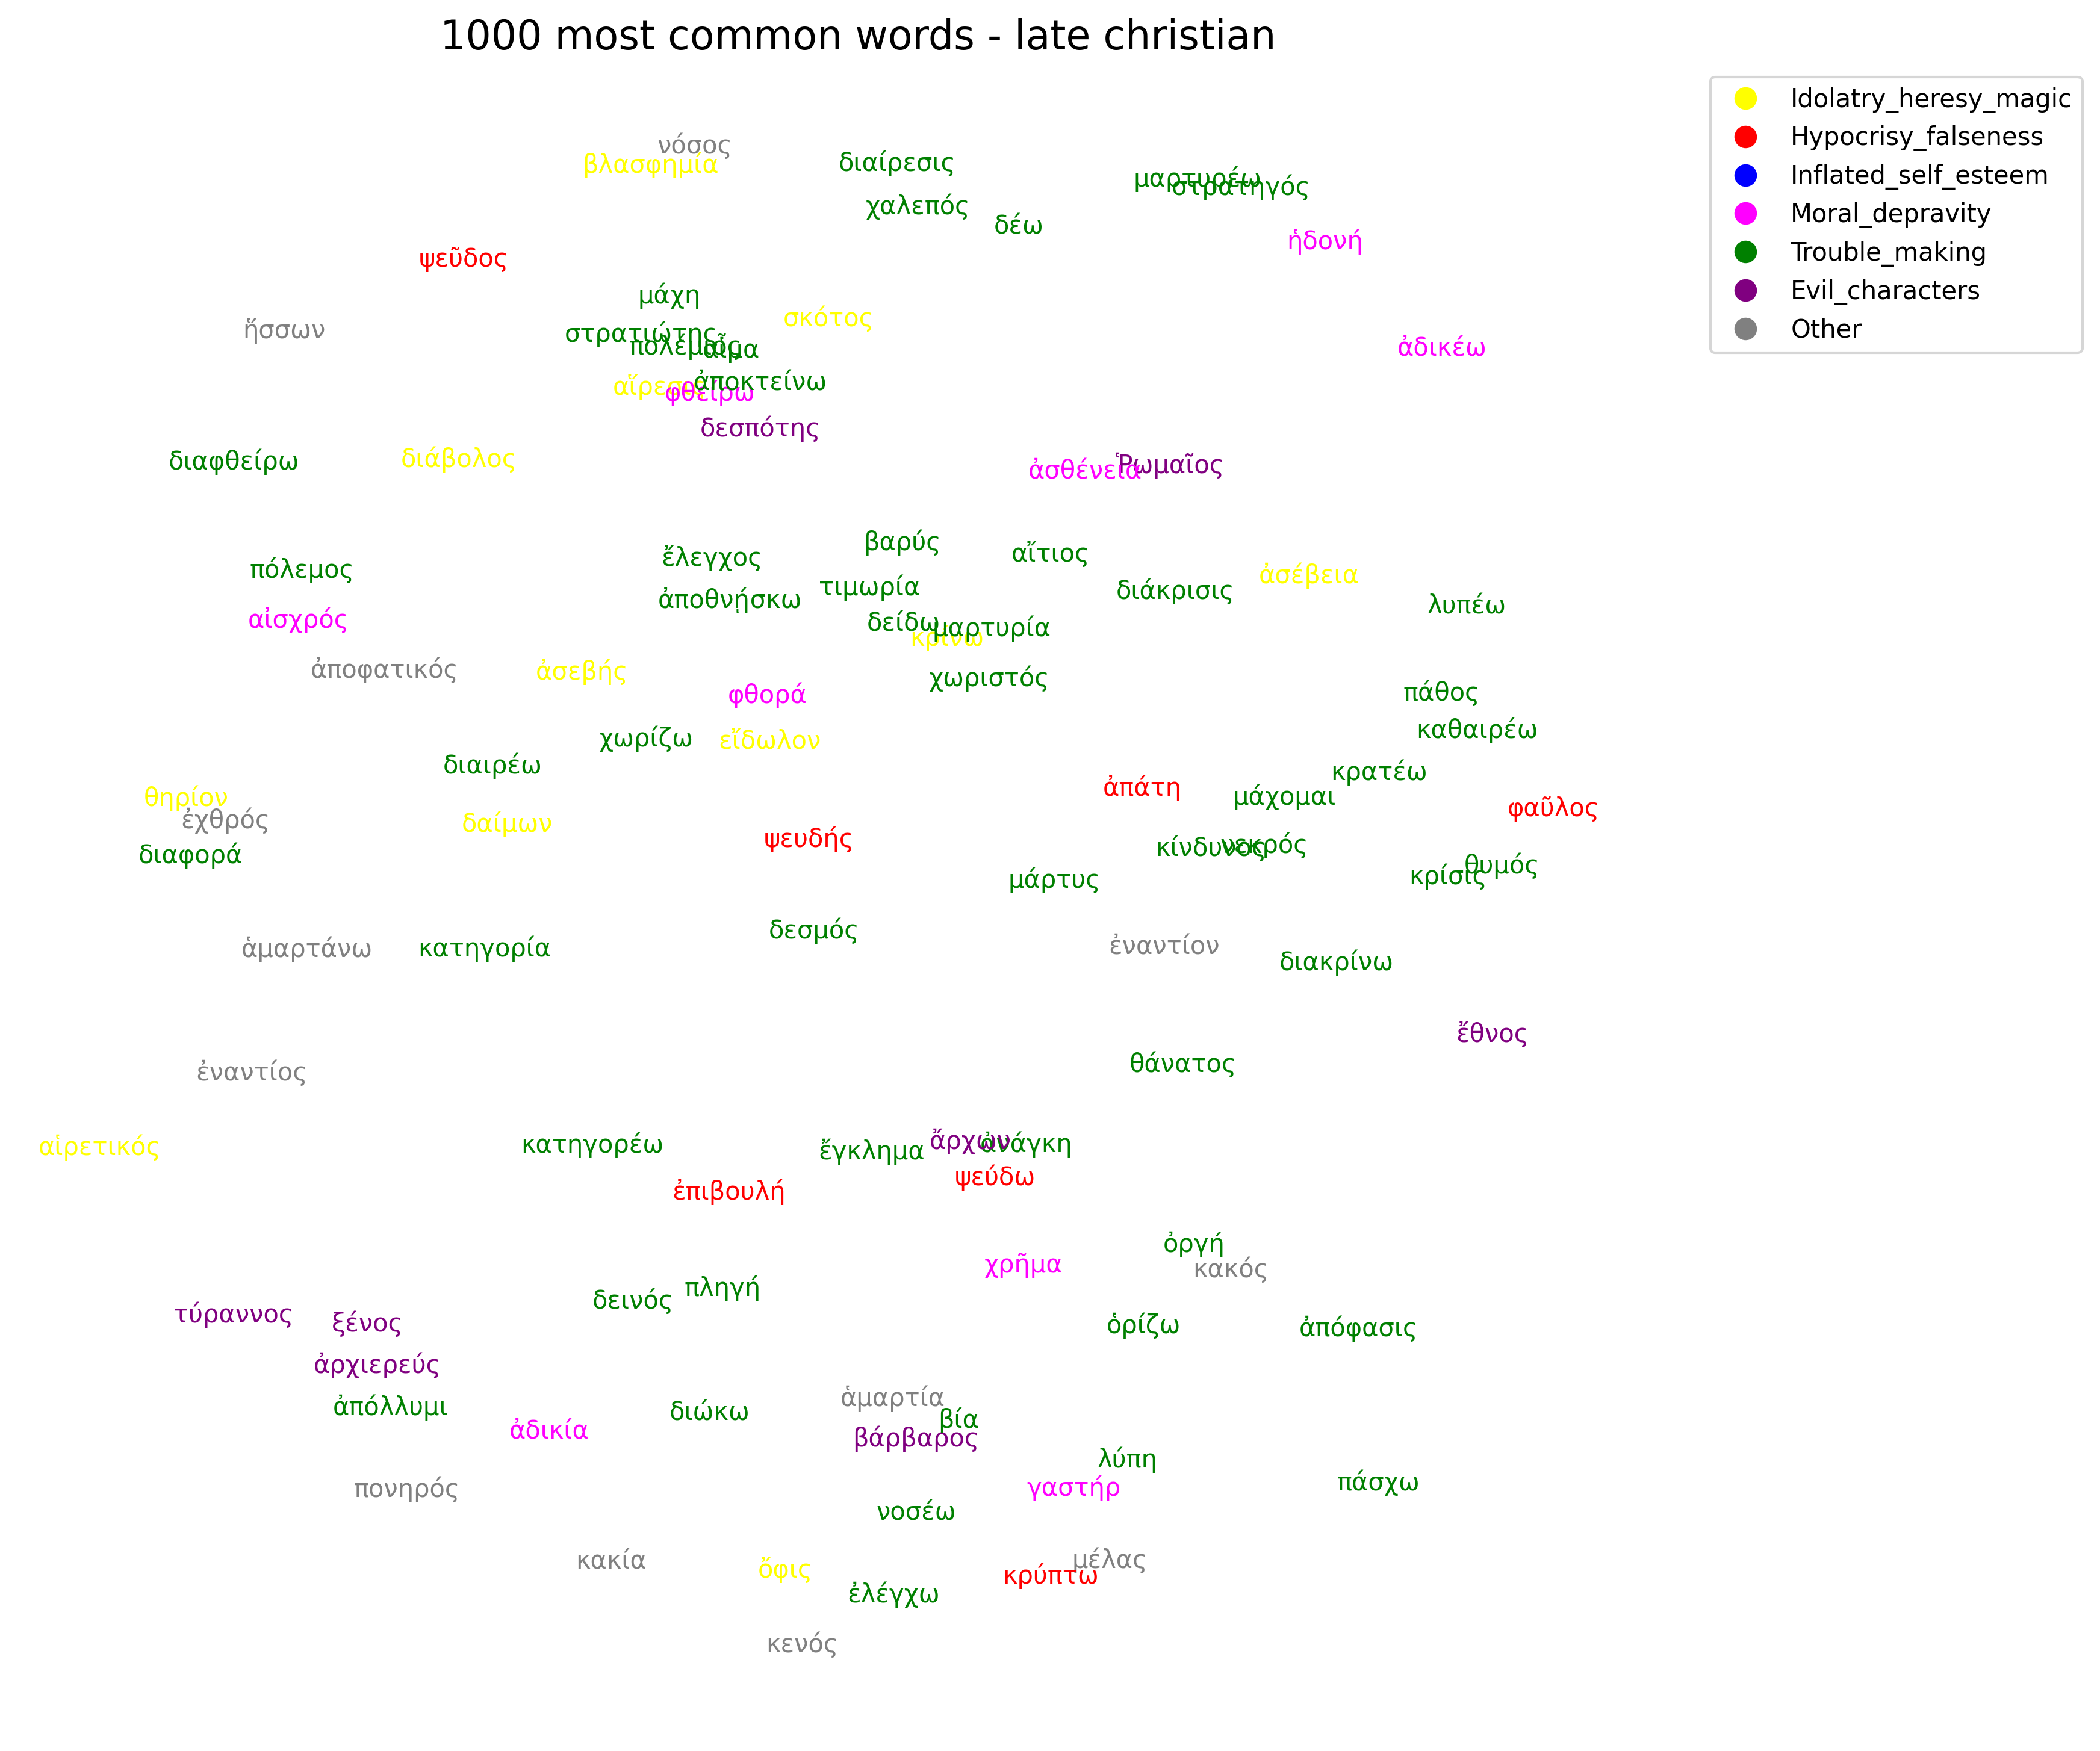

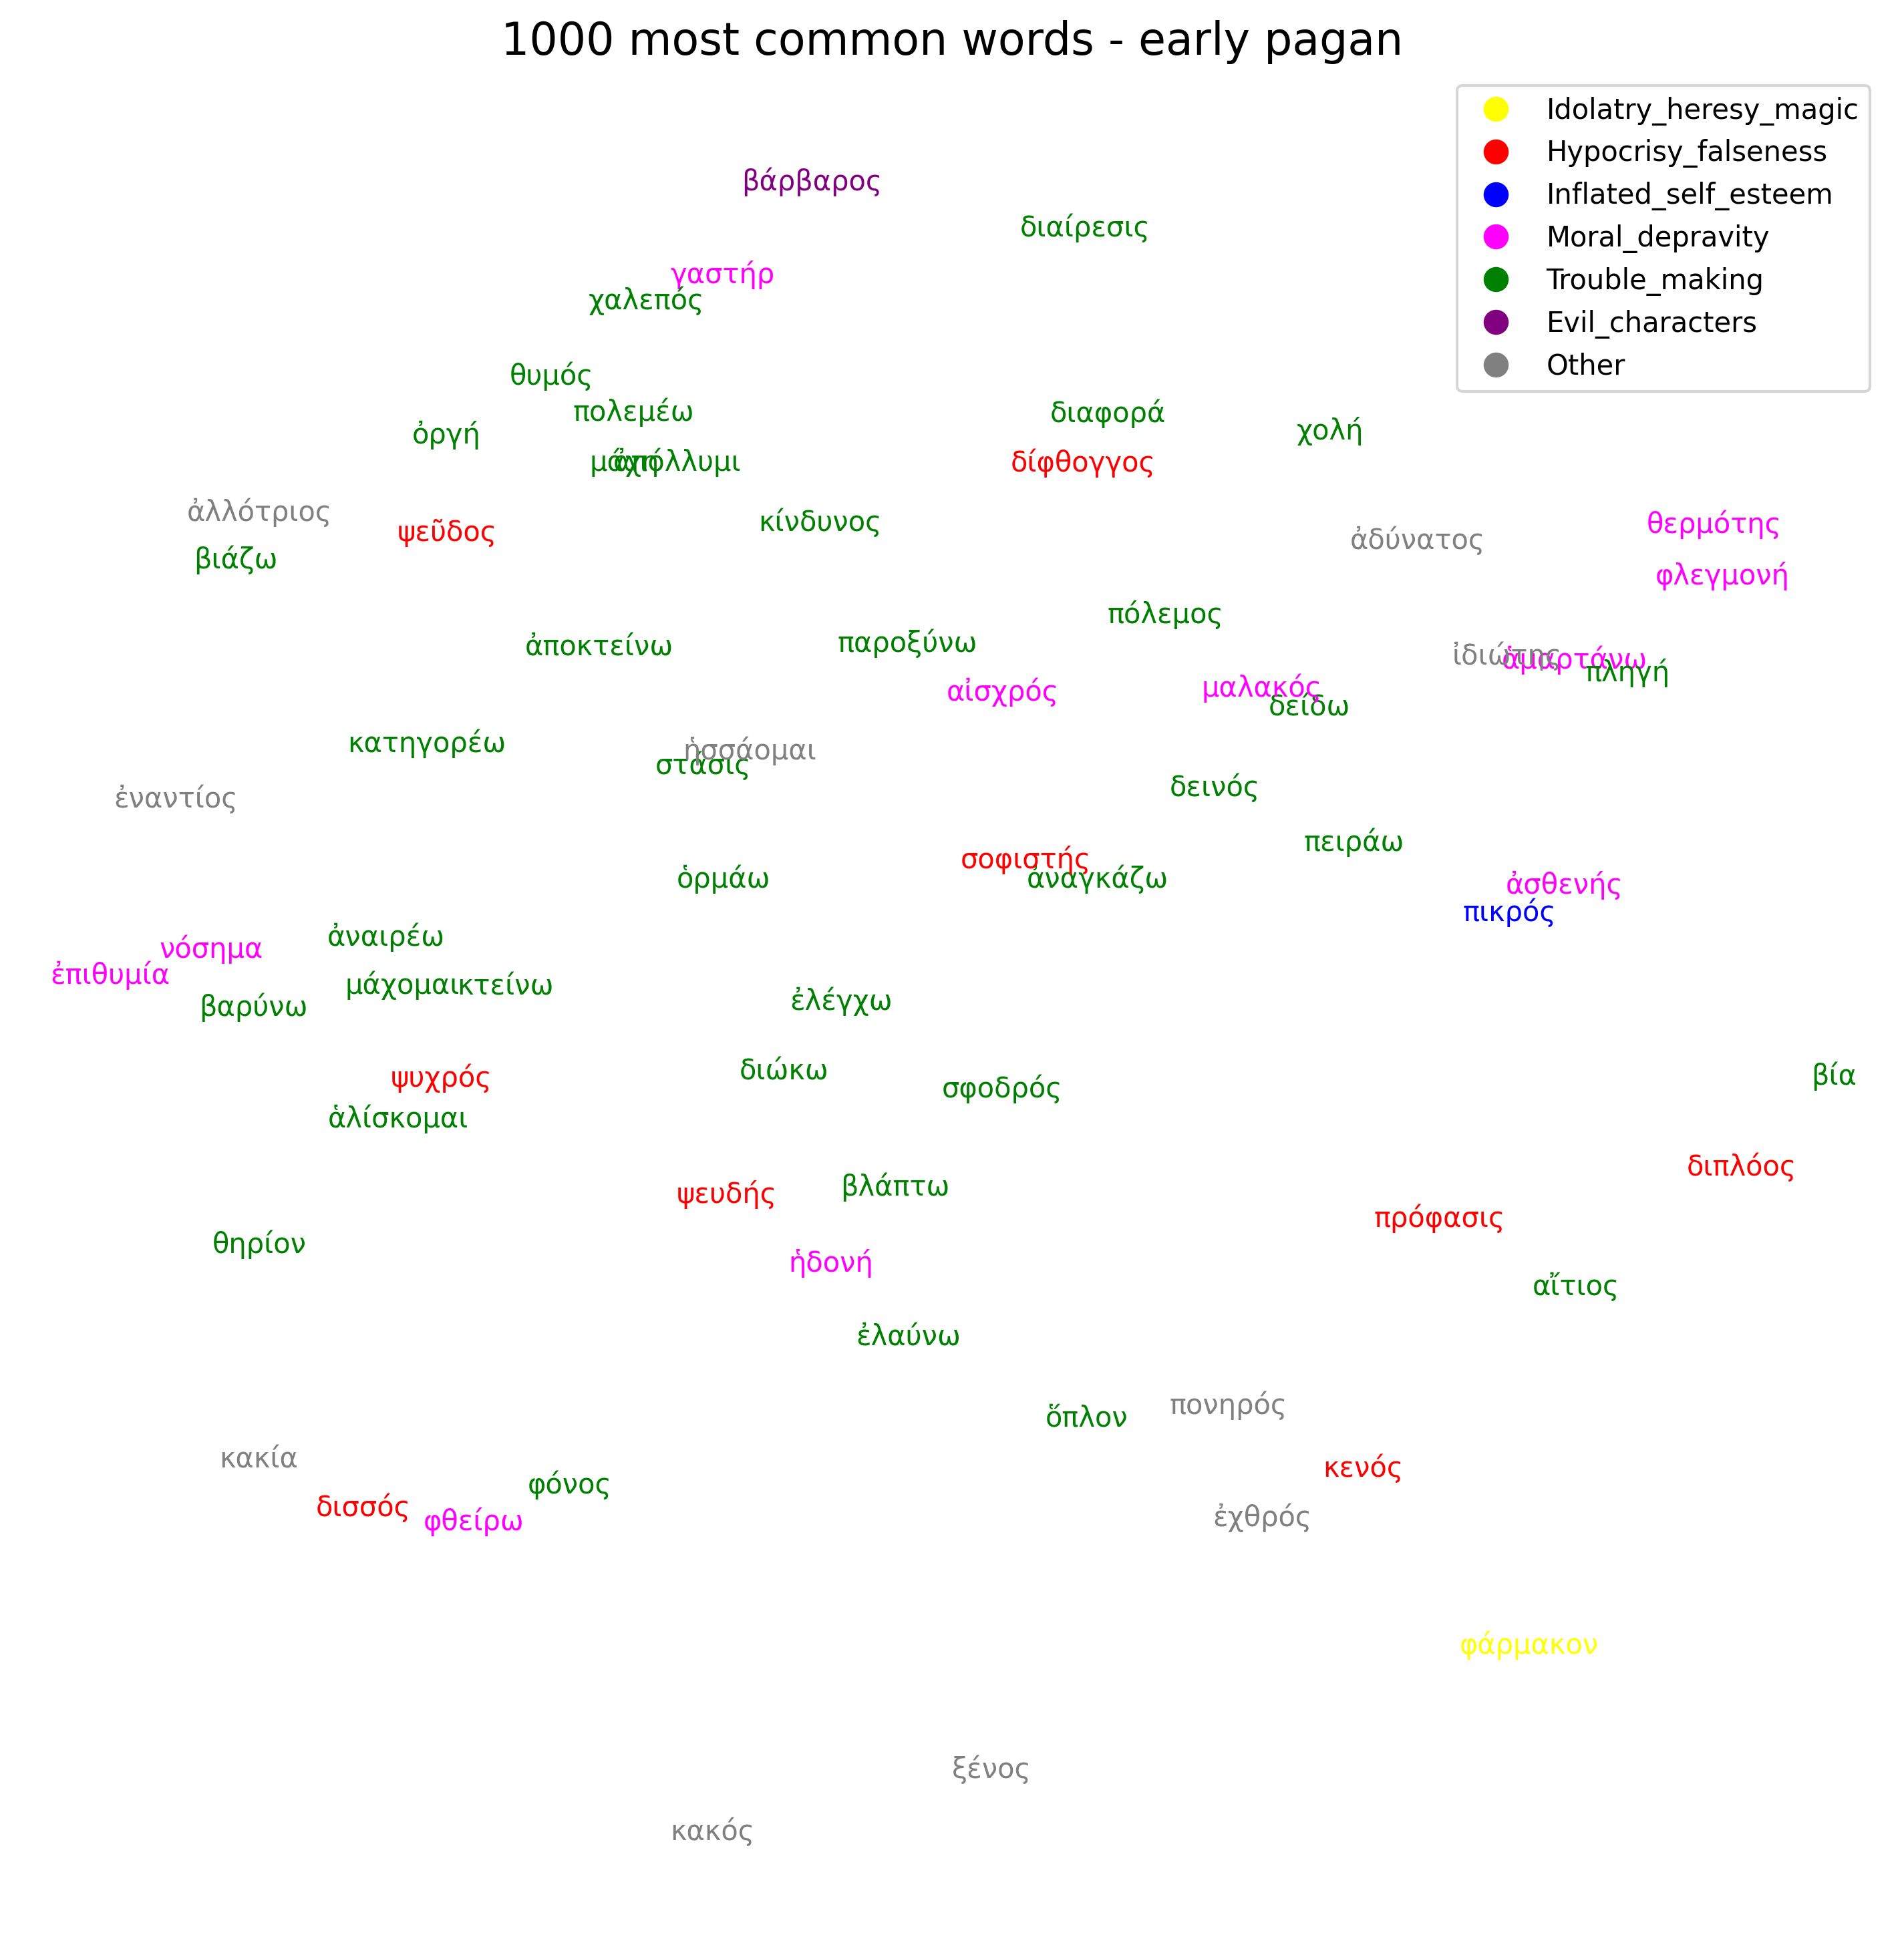

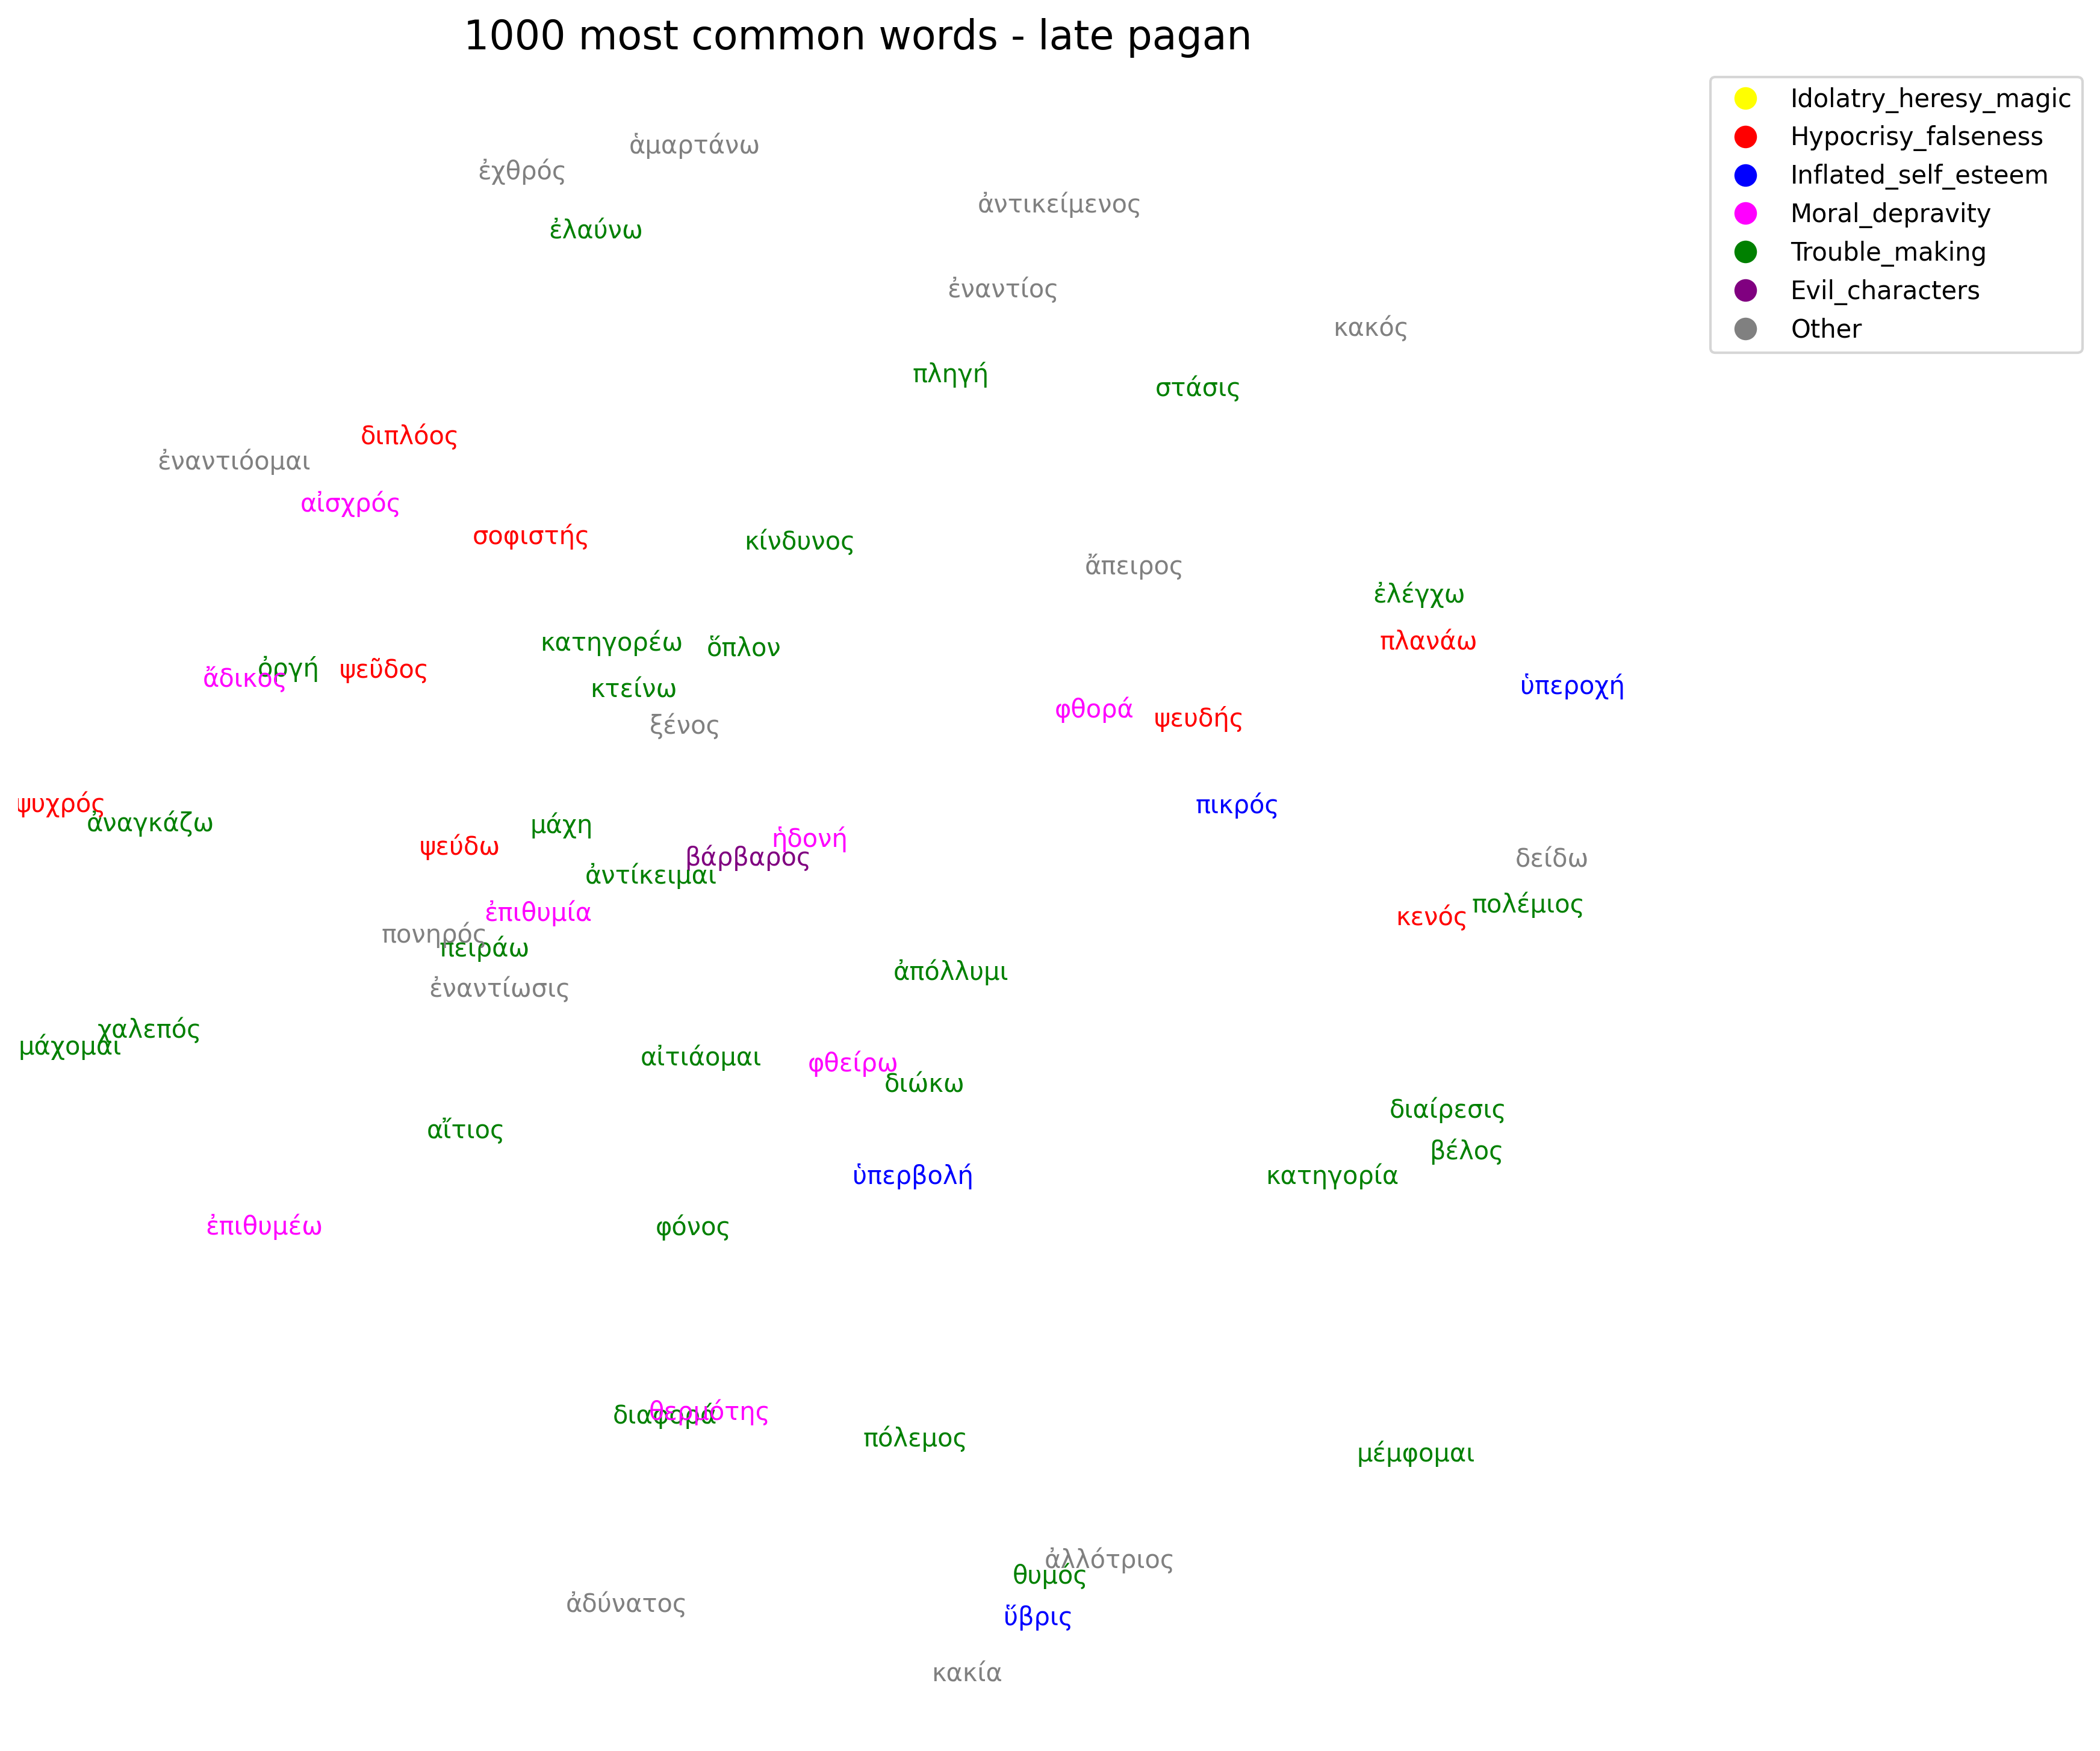

In [29]:
cooc_fig(christian_0_300['lamma_sentence'], fdist1, christ_early_cat, '1000 most common words - early christian')
cooc_fig(christian_300_600['lamma_sentence'], fdist2, christ_late_cat, '1000 most common words - late christian')
cooc_fig(pagan_0_300['lamma_sentence'], fdist3, pagan_early_cat, '1000 most common words - early pagan')
cooc_fig(pagan_300_600['lamma_sentence'], fdist4, pagan_late_cat, '1000 most common words - late pagan')

# frequencies with ektrhros

In [57]:
christian_0_300 = grouped[(grouped["enemy_subcorpus"]=="christian_0_300") & (grouped["lamma_sentence"].str.contains("ἐχθρός"))]
christian_300_600 = grouped[(grouped["enemy_subcorpus"]=="christian_300_600") & (grouped["lamma_sentence"].str.contains("ἐχθρός"))]
pagan_all = grouped[((grouped["enemy_subcorpus"]=="pagan_0_300") | (grouped["enemy_subcorpus"]=="pagan_300_600")) & (grouped["lamma_sentence"].str.contains("ἐχθρός"))]

N = 500

In [58]:
from nltk.probability import FreqDist

stop_words = {'μή', 'ἑαυτοῦ', 'ἄν', "ἀλλ'", 'ἀλλά', 'ἄλλος', 'ἀπό', 'ἄρα', 'αὐτός', "δ'", 'δέ', 'δή', 'διά', 'δαί', 'δαίς', 'ἔτι', 'ἐγώ', 'ἐκ', 'ἐμός', 'ἐν', 'ἐπί', 'εἰ', 'εἰμί', 'εἴμι', 'εἰς', 'γάρ', 'γε', 'γα', 'ἡ', 'ἤ', 'καί', 'κατά', 'μέν', 'μετά', 'μή', 'ὁ', 'ὅδε', 'ὅς', 'ὅστις', 'ὅτι', 'οὕτως', 'οὗτος', 'οὔτε', 'οὖν', 'οὐδείς', 'οἱ', 'οὐ', 'οὐδέ', 'οὐκ', 'περί', 'πρός', 'σύ', 'σύν', 'τά', 'τε', 'τήν', 'τῆς', 'τῇ', 'τι', 'τί', 'τις', 'τίς', 'τό', 'τοί', 'τοιοῦτος', 'τόν', 'τούς', 'τοῦ', 'τῶν', 'τῷ', 'ὑμός', 'ὑπέρ', 'ὑπό', 'ὡς', 'ὦ', 'ὥστε', 'ἐάν', 'παρά', 'σός'}

fdist1 = FreqDist(word for sent in christian_0_300['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)
fdist2 = FreqDist(word for sent in christian_300_600['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)
fdist3 = FreqDist(word for sent in pagan_all['lamma_sentence'] for word in sent.split() if word not in stop_words).most_common(N)

In [59]:
# Combine christ_early_cat and christ_late_cat into one dictionary with unique values per category
pagan_all_cat = {}
for key in set(pagan_early_cat.keys()).union(pagan_late_cat.keys()):
    early = pagan_early_cat.get(key, [])
    late = pagan_late_cat.get(key, [])
    pagan_all_cat[key] = list(set(early + late))

/home/tvrzj/Documents/Projects/approaching_rel/.env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


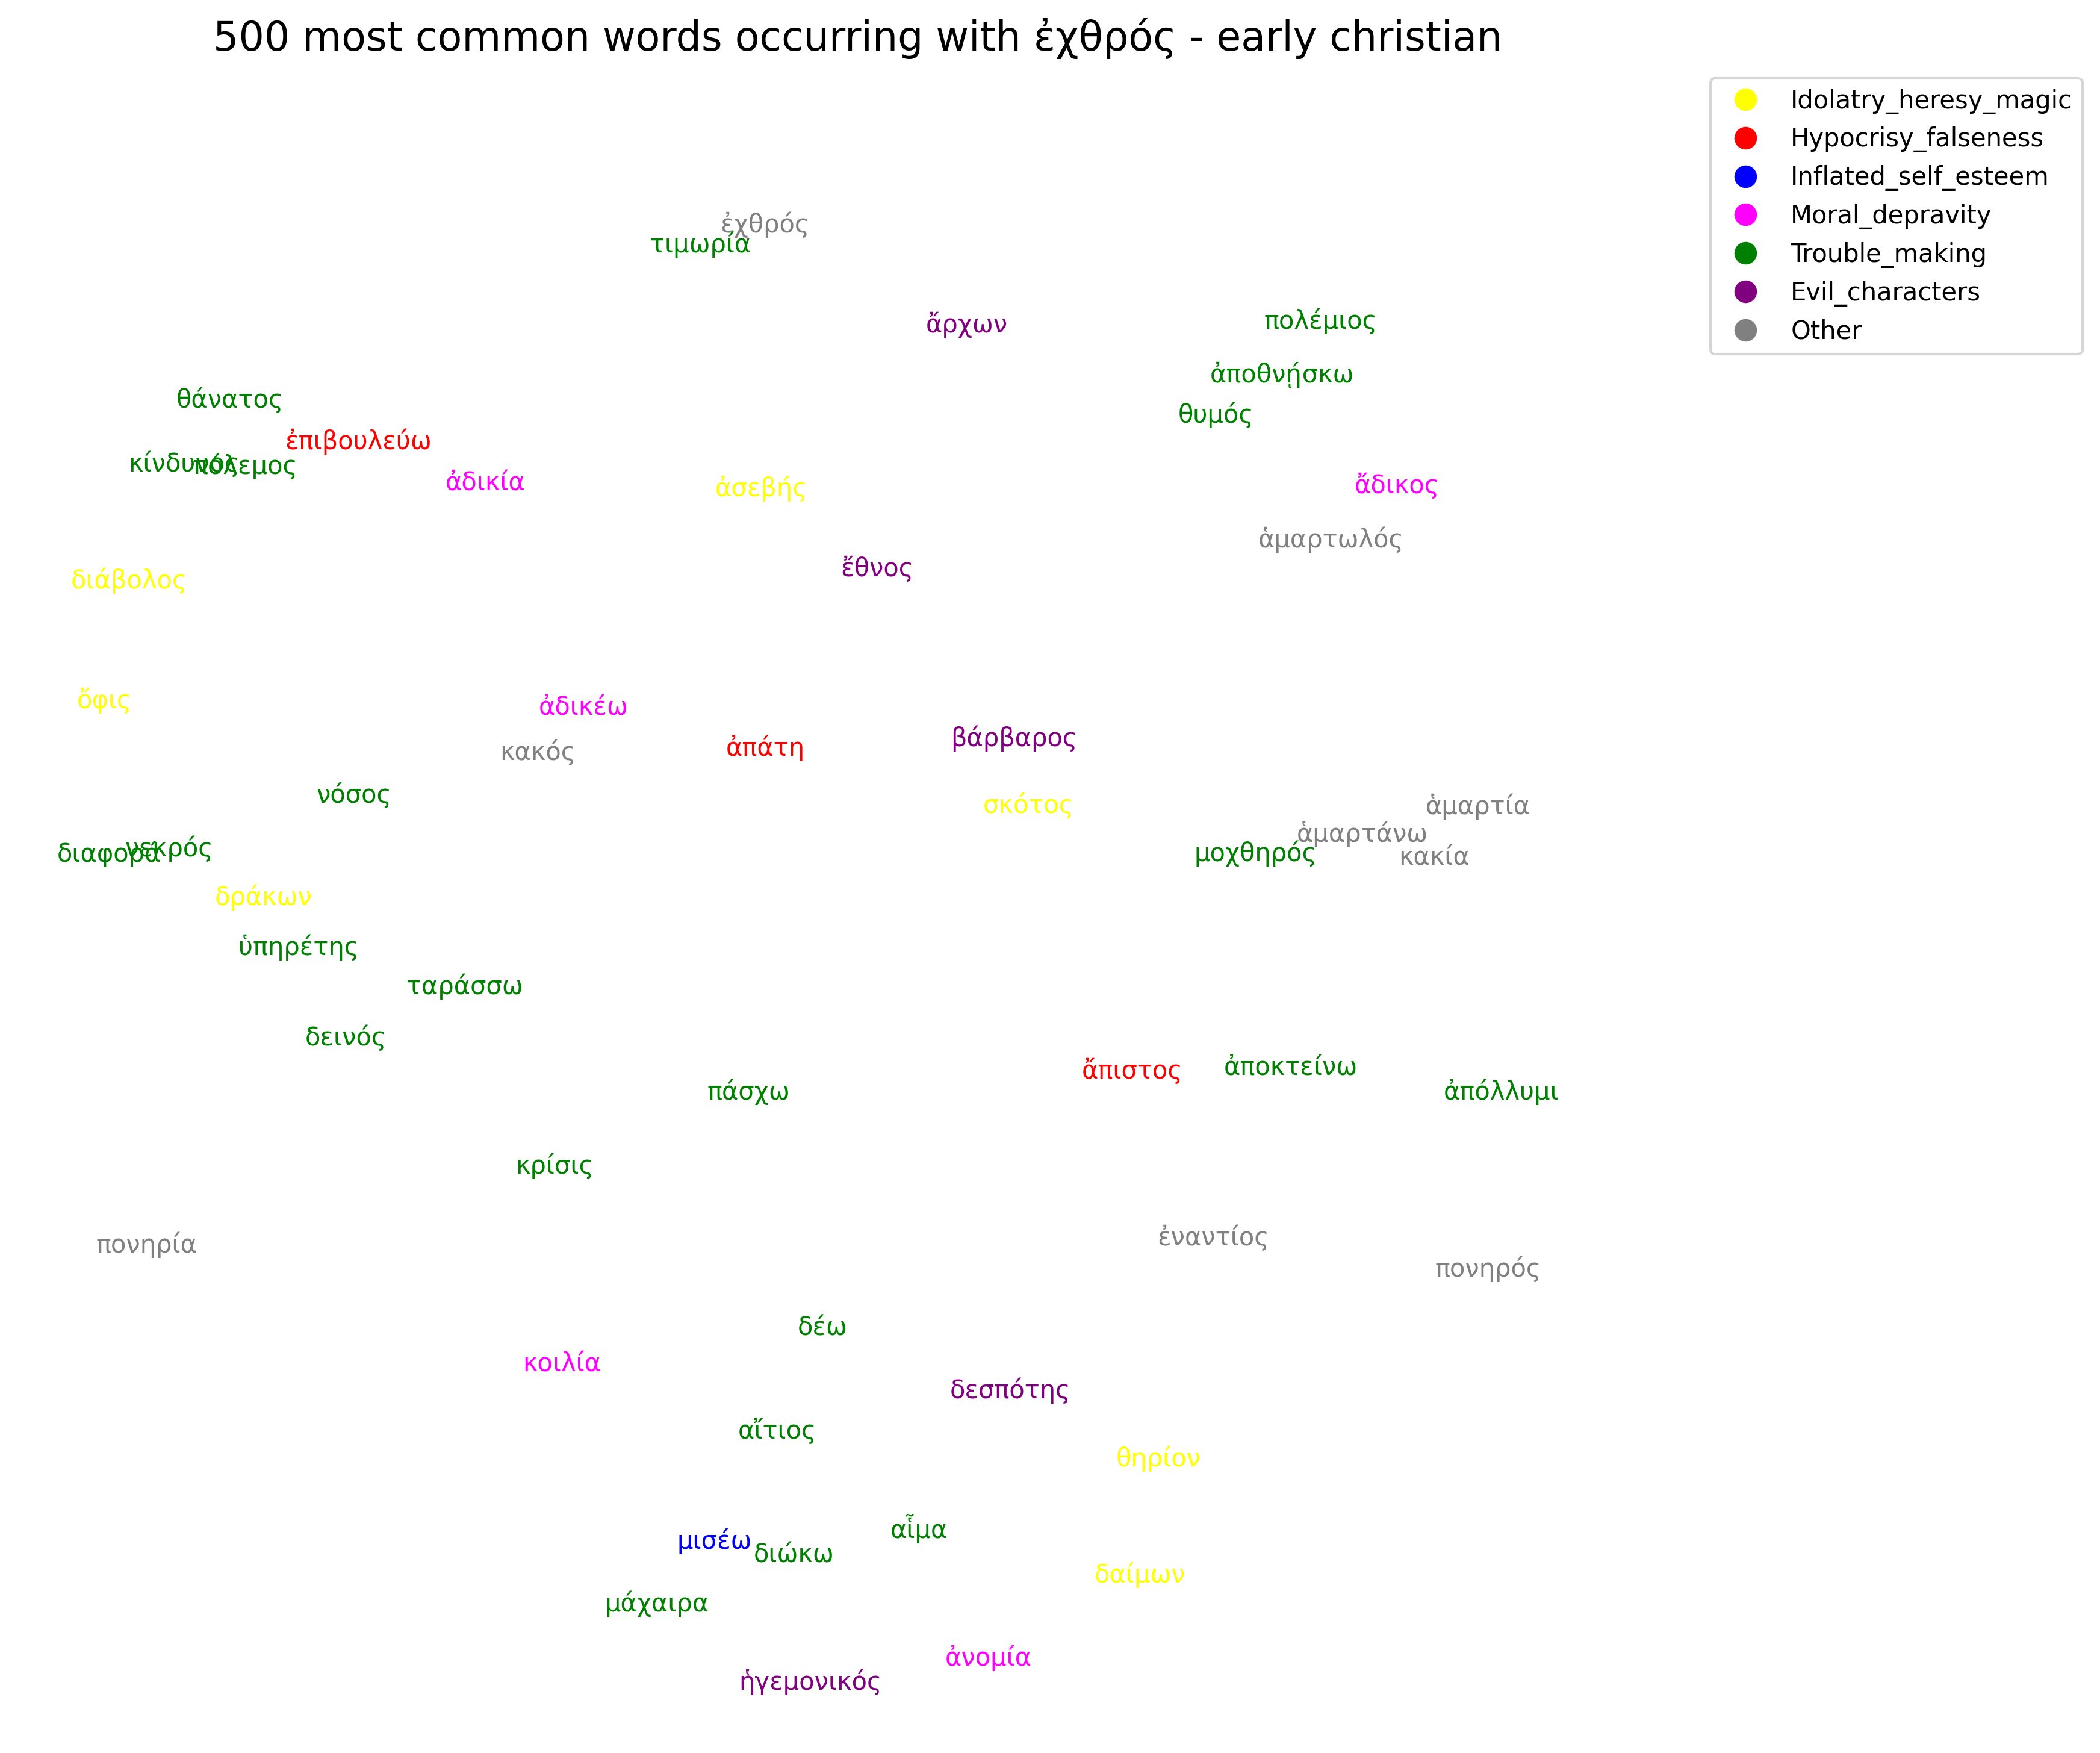

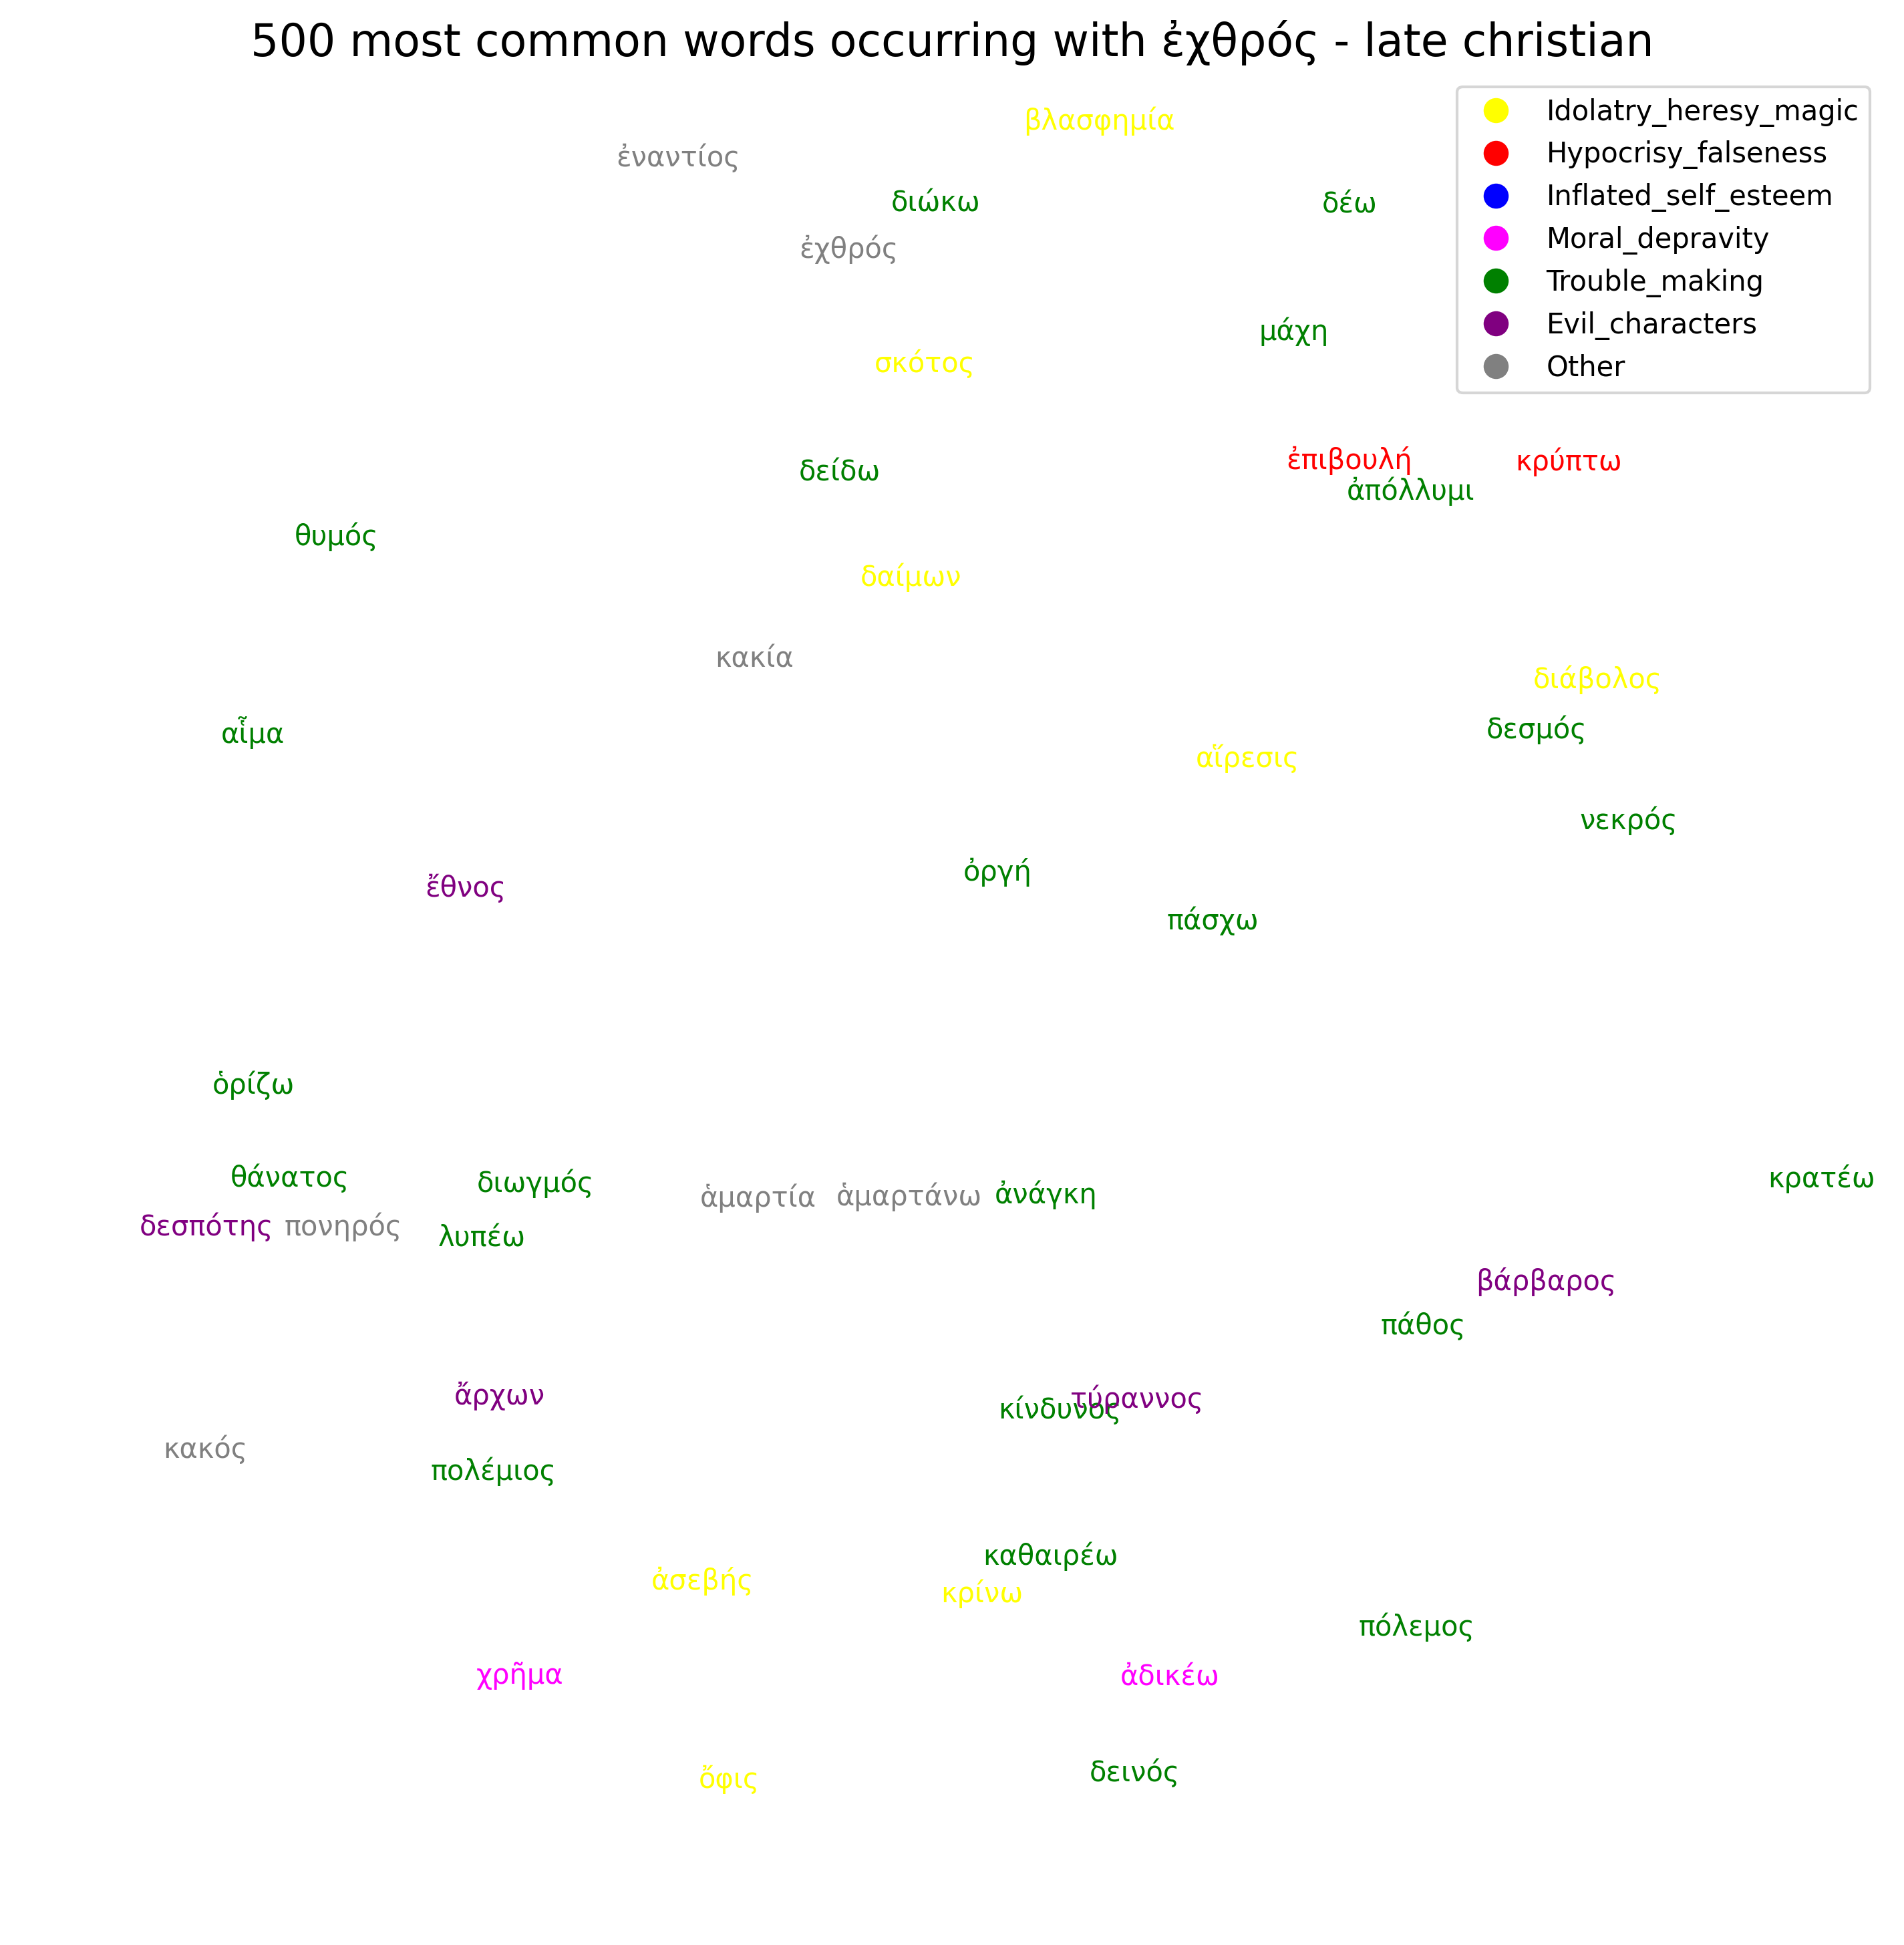

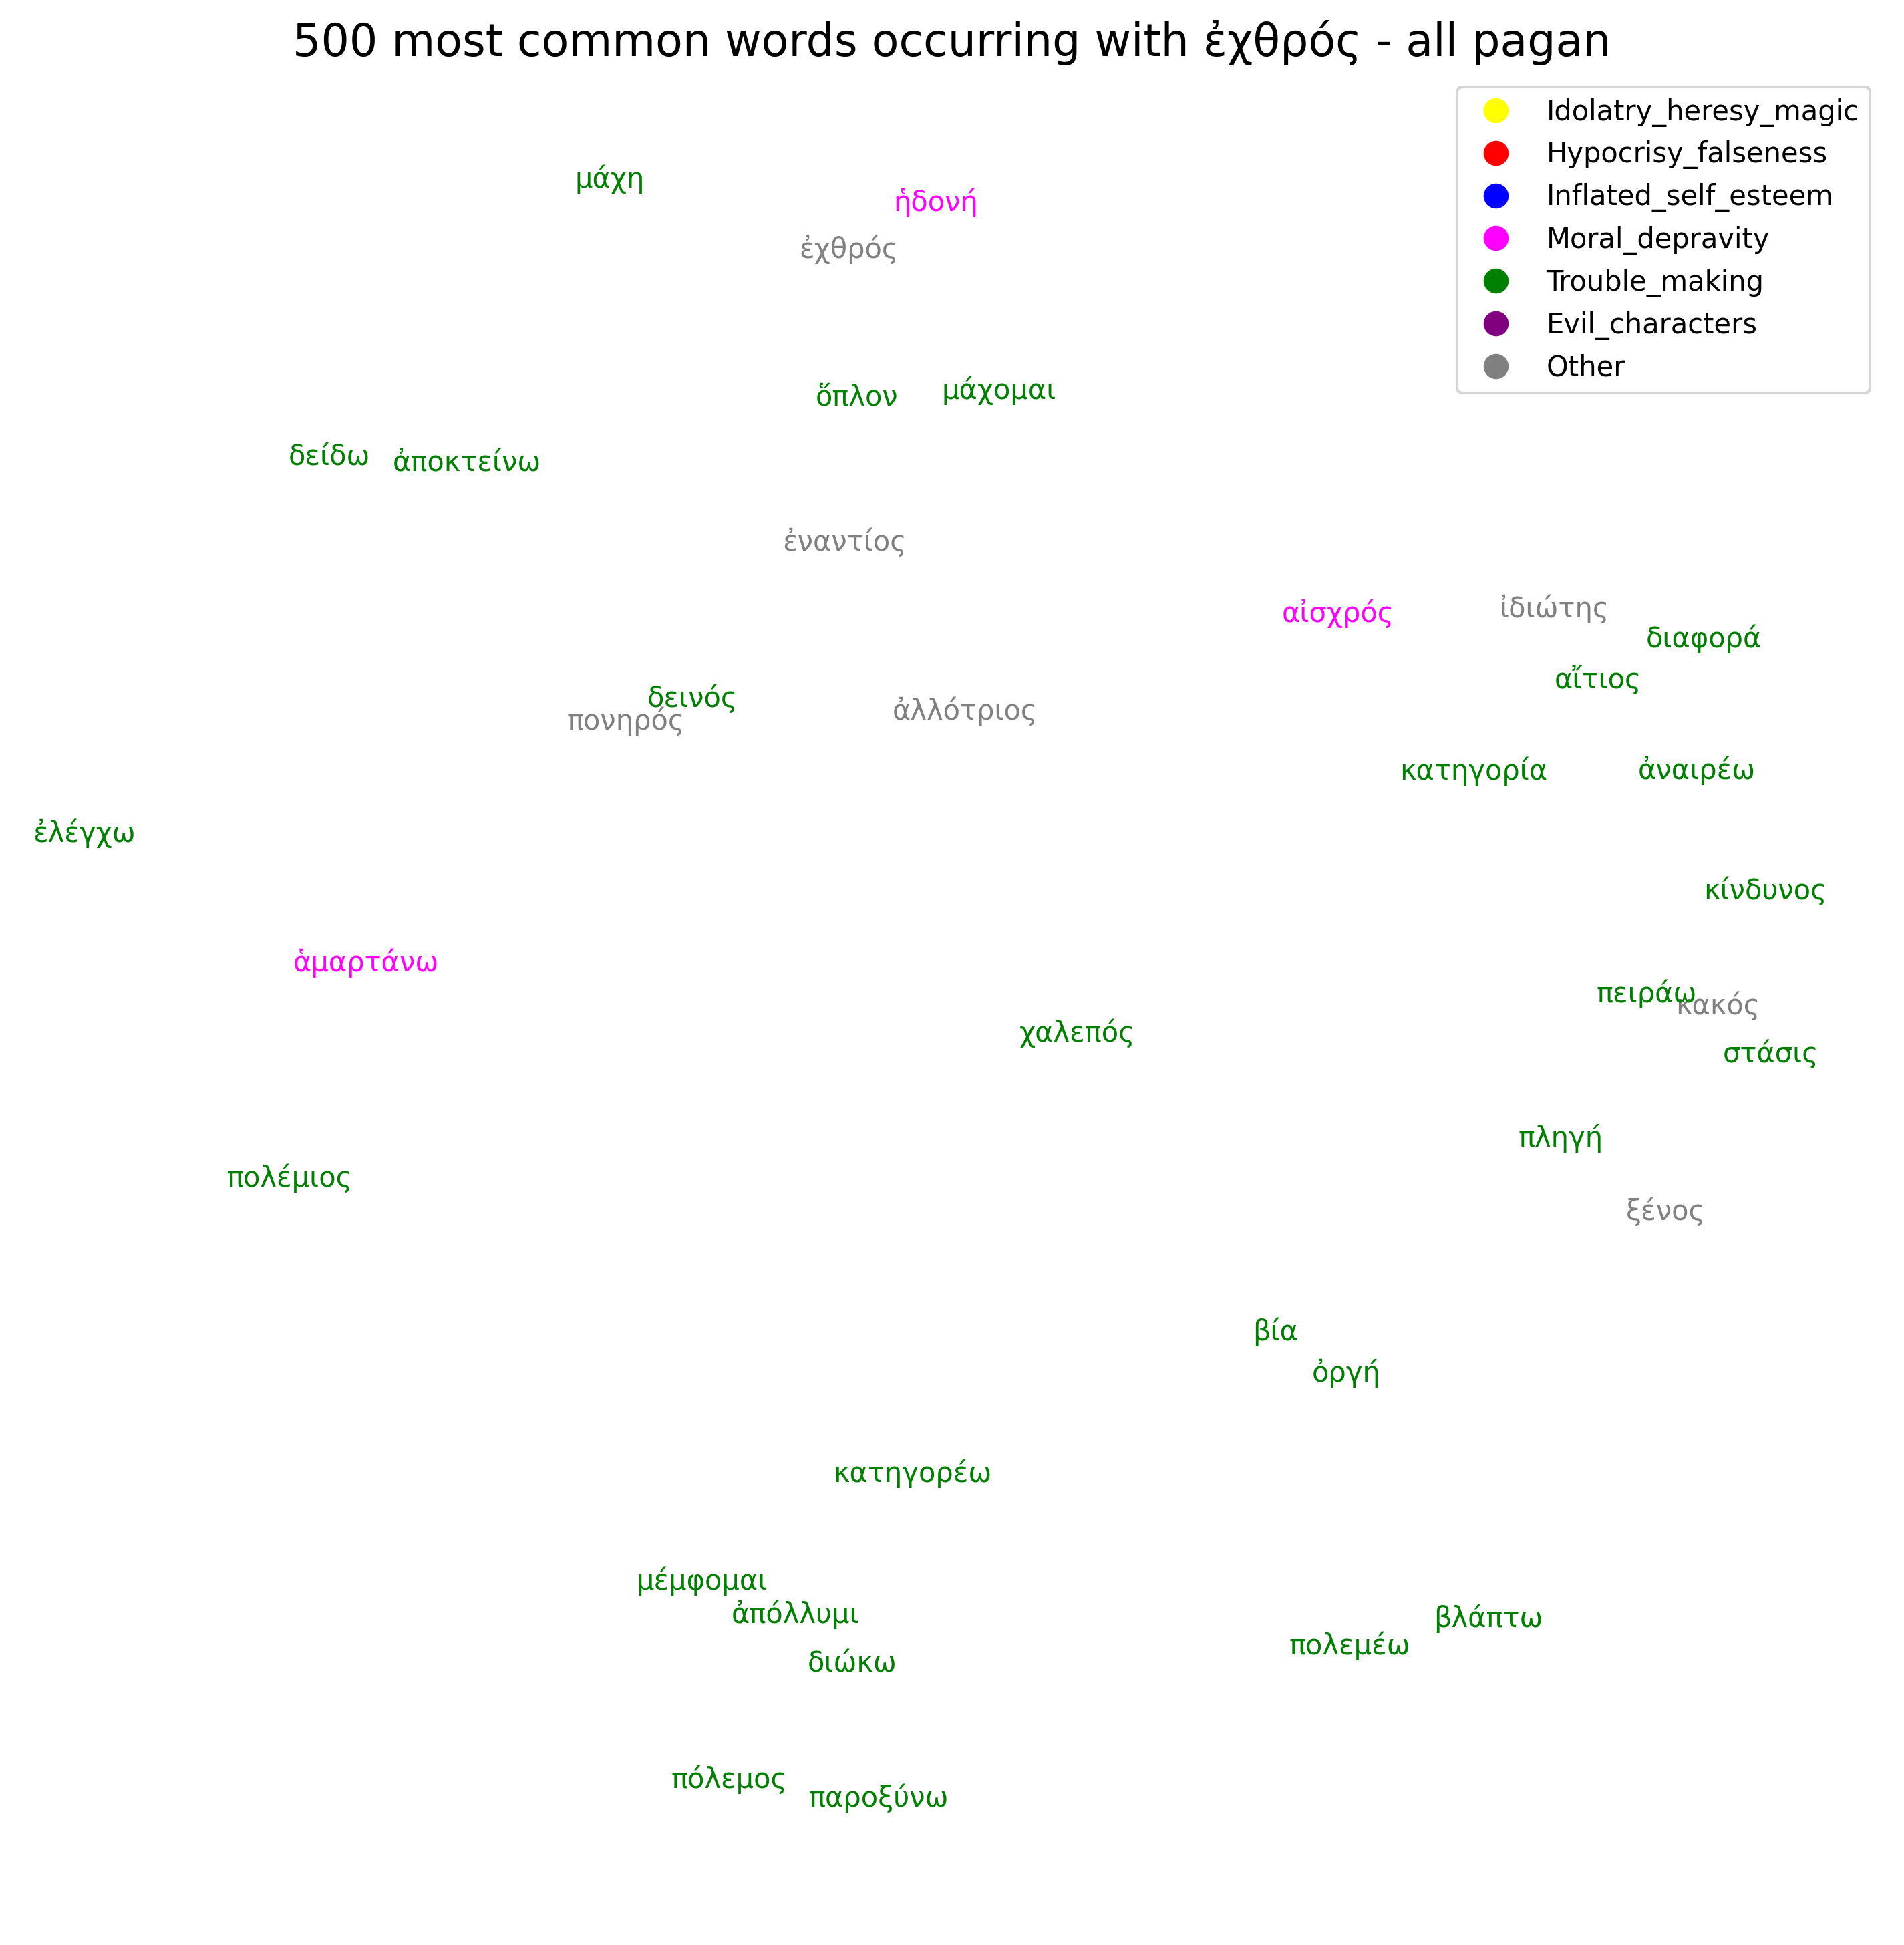

In [60]:
cooc_fig(christian_0_300['lamma_sentence'], fdist1, christ_early_cat, f'{N} most common words occurring with ἐχθρός - early christian')
cooc_fig(christian_300_600['lamma_sentence'], fdist2, christ_late_cat, f'{N} most common words occurring with ἐχθρός - late christian')
cooc_fig(pagan_all['lamma_sentence'], fdist3, pagan_all_cat, f'{N} most common words occurring with ἐχθρός - all pagan')